# Infinite Series

(adapted from CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh)


Chapter 7 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Know how to check series convergence using the ratio test
- Use power series, particularly the radius of convergence
- Understand how to take derivatives and integrals of power series

## Infinite Series

Many times, we can simulate chemical or physical properties using an infinite series. While it may seem impractical, we can often find that a finite approximation is "good enough" or that the infinite series *converges* to some finite value.

For example, the ideal gas law for one mole of molecules is:

$$
P = \frac{RT}{V}
$$

This only works well with very simple gases (e.g., no interactions), high temperatures, low pressures, etc. We can extend the approximation for real gases using the [virial expansion](https://en.wikipedia.org/wiki/Virial_expansion):

$$
P=\frac{R T}{V}\left(1+\frac{B}{V}+\frac{C}{V^{2}}+ … +\frac{U}{V^{n}}+\frac{W}{V^{2 n}}\right)
$$

The first term is identical to the ideal gas law, reflecting non-interacting atoms/molecules, the second term corrects for bi-molecular interactions, etc. We can often simply take a finite sum of 2-3 terms to handle real gases.

In other words, we can often take a partial sum:

$$
S_{N}=\sum_{n=0}^{N} u_{n}=u_{0}+u_{1}+\ldots+u_{N}
$$

where $n$ is an index to help us count (like the variable in a `for` loop in a programming language like Python).

The key question is whether the series converges:

$$
\lim _{N \rightarrow \infty} S_{N}=S
$$

Let's consider the [*geometric series*](https://en.wikipedia.org/wiki/Geometric_series)

$$
\sum_{n=0}^{\infty} x^{n}=1+x+x^{2}+x^{3}+\ldots
$$

This series is related to [Zeno's paradox](https://en.wikipedia.org/wiki/Zeno%27s_paradoxes#Dichotomy_paradox) - if we have to travel $\frac{1}{2}$ of the way along a path, then $\frac{1}{4}$, then $\frac{1}{8}$, etc.  an infinite number of steps, how do we ever get anywhere?

In [1]:
x = 0.5
total = 0.0
for n in range(0, 11): # remember, we'll go to 10 - it omits the final value
    total = total + x**n
    print(n, x, total)

0 0.5 1.0
1 0.5 1.5
2 0.5 1.75
3 0.5 1.875
4 0.5 1.9375
5 0.5 1.96875
6 0.5 1.984375
7 0.5 1.9921875
8 0.5 1.99609375
9 0.5 1.998046875
10 0.5 1.9990234375


Okay, so for $\frac{1}{2}$ the series clearly converges to 2. (Feel free to change the loop to confirm this to your satisfaction.) Zeno can have the paradox, but math shows that an infinite sum of fractions can lead to a finite number.

What about other geometric series, like $\sum \frac{1}{3}^n$ or $\sum \frac{1}{4}^n$?

In [2]:
# two loops - one for the x fraction, then an inner loop for the partial sum:
for fraction in range(2, 6): # check fractions from 1/2 to 1/5
    x = 1 / fraction
    total = 0.0
    for n in range(0, 11): # remember, we'll go to 10 - it omits the final value
        total = total + x**n
    
    # this runs after the "inner" loop runs
    print(round(x, 3), round(total,4))

0.5 1.999
0.333 1.5
0.25 1.3333
0.2 1.25


There's clearly a pattern here. 

$$
\begin{array}{ll}
x & sum \\
\hline
\frac{1}{2} & 2 \\
\frac{1}{3} & \frac{3}{2} \\
\frac{1}{4} & \frac{4}{3} \\
\frac{1}{5} & \frac{5}{4} \\
\end{array}
$$

We can look at the infinite series and play around a bit like algebra. For example, if we take the partial sum and subtract the *next* value in the series:

$$
\begin{aligned}
S_{N}-x S_{N} &=1+x+\ldots+x^{N}-\left(x+x^{2}+\ldots+x^{N+1}\right) \\
&=1-x^{N+1}
\end{aligned}
$$

We can then get:
$$
S_{N}=\frac{1-x^{N+1}}{1-x}
$$

If $x$ is less than one, the $x^{N+1}$ term will become infinitesimal, leaving us with:

$$
\sum_{n=0}^{\infty} x^{n}=1+x+x^{2}+x^{3}+\ldots=\frac{1}{1-x} \quad|x|<1
$$

If $x$ is larger than one, the series *diverges* (i.e., the sum will be infinite).

### Ratio Test for Convergence

How do we know if a series converges? Our example above with the geometric series should offer a hint. We managed to solve for the limit by taking a term  and subtracting the next term in the series. In other words, for series that converge, presumably the terms get smaller and smaller.

<div class="alert alert-block alert-success">

This leads to the **ratio test**:

$$
r=\lim _{n \rightarrow \infty}\left|\frac{u_{n+1}}{u_{n}}\right|
$$

If r < 1 the series converges, if r > 1 the series diverges, and if r = 1 the test is inconclusive.
    
</div>
    
For the geometric series, we see:

$$
\lim _{n \rightarrow \infty}\left|\frac{x^{n+1}}{x^{n}}\right|=|x|
$$
    
Which is exactly what we said - if $x$ is less than one, the series converges.
    
### Harmonic Series

As another example, the [*harmonic series*](https://en.wikipedia.org/wiki/Harmonic_series_(mathematics)) is:

$$
\sum_{n=1}^{\infty} \frac{1}{n}=1+\frac{1}{2}+\frac{1}{3}+\frac{1}{4}+\ldots
$$

<img src="./images/harmonic-series.png" width=225 />

Does this converge?

$$
r=\left|\frac{u_{n+1}}{u_{n}}\right|=\lim _{n \rightarrow \infty}\left|\frac{n}{n+1}\right|=1
$$

Hmm, this is inconclusive. We can compare the harmonic series to a related one, where each term in the harmonic series is replaced by the next largest power of two:

$$
S=1+\frac{1}{2}+\frac{1}{4}+\frac{1}{4}+\frac{1}{8}+\frac{1}{8}+\frac{1}{8}+\frac{1}{8}+\ldots
$$

This new series diverges, since each set of fractions sums to $\frac{1}{2}$

$$
\begin{aligned}
S &=1+\frac{1}{2}+\left(\frac{1}{4}+\frac{1}{4}\right)+\left(\frac{1}{8}+\frac{1}{8}+\frac{1}{8}+\frac{1}{8}\right) \cdots \\
&=1+\frac{1}{2}+\frac{1}{2}+\frac{1}{2}+\ldots=\infty
\end{aligned}
$$

Since each term in the harmonic series is larger, it must also diverge.
    
### Exponential Series
    
We can approximate the exponential function (particularly near $x = 0$) as:
    
$$
e^{x}=\sum_{n=0}^{\infty} \frac{1}{n !} x^{n}=1+x+\frac{1}{2 !} x^{2}+\frac{1}{3 !} x^{3}+\ldots
$$
    
Or put another way:
$$
e^x \approx 1 + x + \frac{1}{2}x^2 + \ldots
$$
    
Let's plot this approximation:

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use('./chem1000.mplstyle')

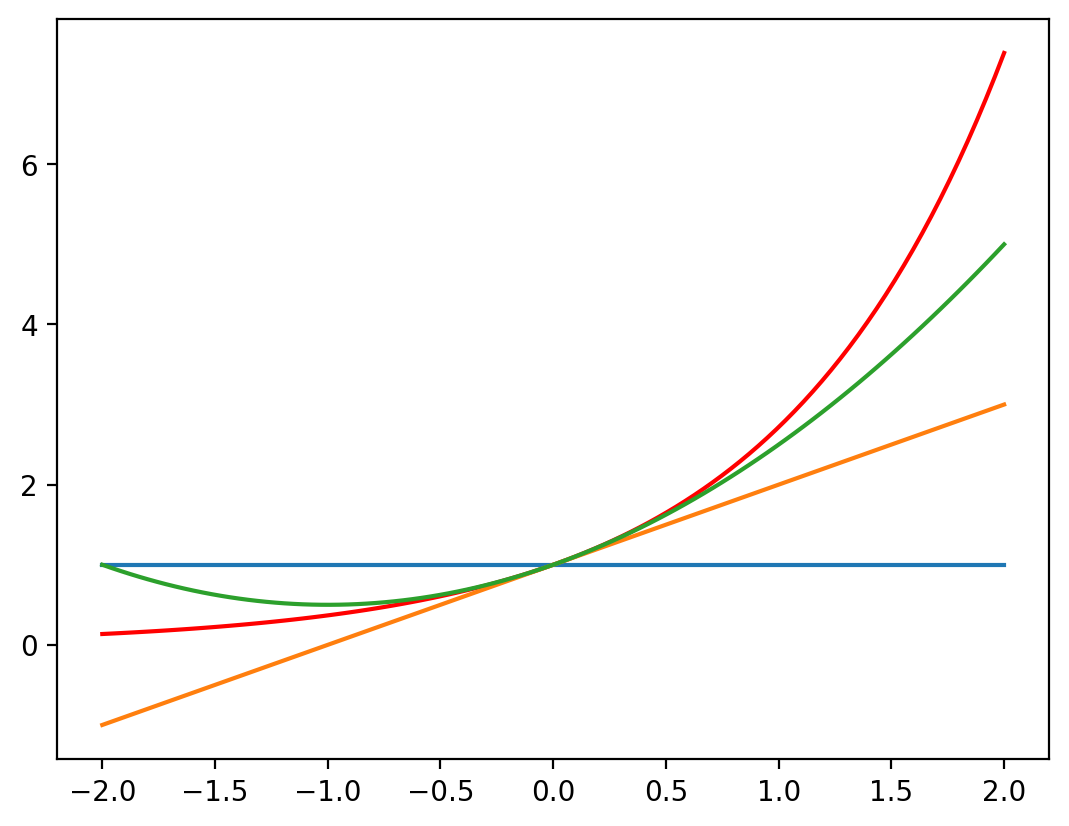

In [5]:
x = np.linspace(-2, 2, 100) # 100 points from -4 to 4

plt.plot(x, np.exp(x), color='red')

plt.plot(x, np.ones(100)) # np.ones will give me a set of 1 with the same size as x
plt.plot(x, 1 + x)
plt.plot(x, 1 + x + 1/2*x**2)

Hmm, maybe you're skeptical. But clearly around $x=0$ the green curve (e.g., ±0.5), our quadratic approximation, isn't ***that*** bad at approximating $e^x$.

Clearly the farther we get from $x=0$ the worse these approximations do and we'd need more terms:

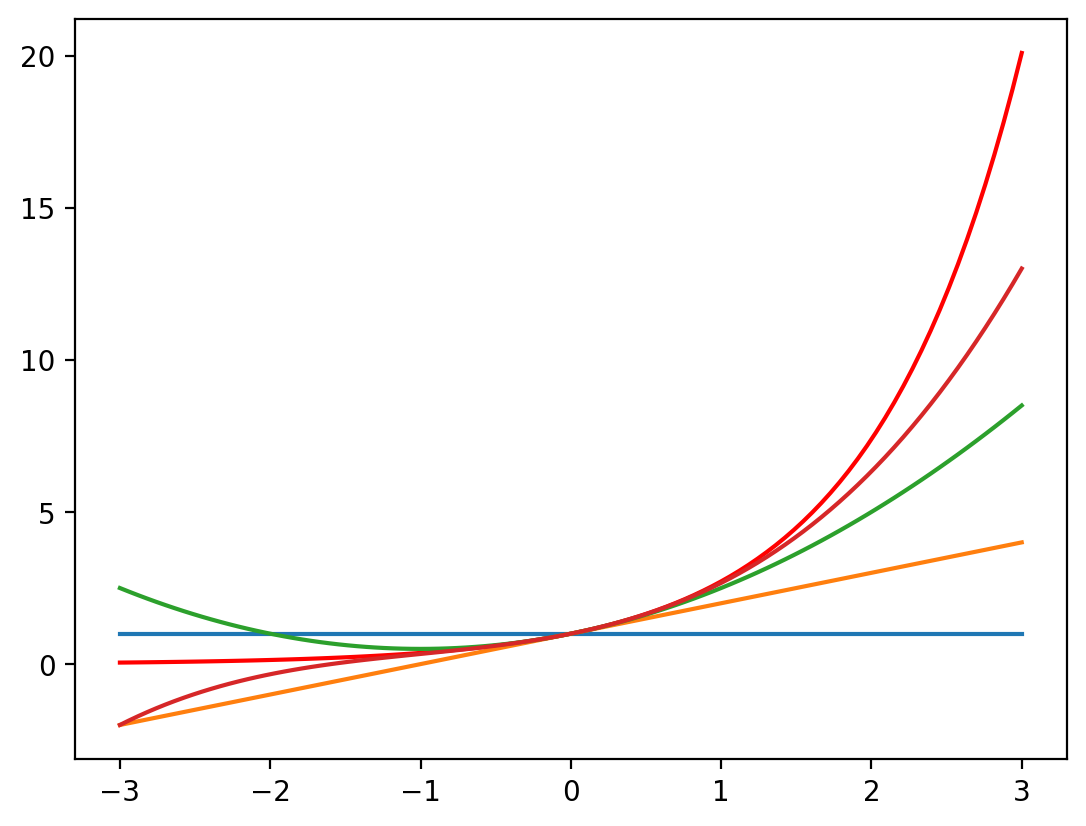

In [6]:
x = np.linspace(-3, 3, 100) # 100 points from -4 to 4

plt.plot(x, np.exp(x), color='red')

plt.plot(x, np.ones(100)) # np.ones will give me a set of 1 with the same size as x
plt.plot(x, 1 + x)
plt.plot(x, 1 + x + 1/2*x**2)
plt.plot(x, 1 + x + 1/2*x**2+ 1/6*x**3) # cubic approximation FTW!

### But does it converge?

Okay, let's see if this exponential series converges?

$$
r=\left|\frac{u_{n+1}}{u_{n}}\right|=\lim _{n \rightarrow \infty}\left|\frac{n ! x^{n+1}}{(n+1) ! x^{n}}\right|
$$

Remember that $n!$ is $1 \times 2 \times 3 \ldots n$

So the limit is:

$$
r=\lim _{n \rightarrow \infty}\left|\frac{x}{n+1}\right|=0
$$

Since $n \rightarrow \infty$ this  should converge for any value of $x$.

### Power Series

<div class="alert alert-block alert-success">

Many functions can be represented by an infinite series in powers of $x$:

$$
S(x)=\sum_{n=0}^{\infty} a_{n} x^{n}=a_{0}+a_{1} x+a_{2} x^{2}+\ldots
$$
    
</div>

How do we know if these **power series** converge?

The ratio test gives us:

$$
r=\left|\frac{u_{n+1}}{u_{n}}\right|=\lim _{n \rightarrow \infty}\left|\frac{a_{n+1} x^{n+1}}{a_{n} x^{n}}\right|=|x| \lim _{n \rightarrow \infty}\left|\frac{a_{n+1}}{a_{n}}\right|<1
$$

Notice that we pulled $|x|$ out of the limit.

Essentially that means there's a "radius of convergence" (R) for $x$:

$$
\lim _{n \rightarrow \infty}\left|\frac{a_{n}}{a_{n+1}}\right|=R
$$

Let's see an example:

$$
S_{N}(x)=\sum_{n=1}^{N} \frac{1}{n}\left(\frac{x}{2}\right)^{n}
$$

In this case, the coefficients are $\frac{1}{n 2^n}$, so:

$$
R=\lim _{n \rightarrow \infty}\left|\frac{a_{n}}{a_{n+1}}\right|=\lim _{n \rightarrow \infty} \frac{(n+1) 2^{n+1}}{n 2^{n}}=2
$$

### Integrals and Derivatives of Power Series

If the power series converges inside a region, it must be a continuous function, and of course the individual terms $x, x^2, x^3, \ldots$ are differentiable. So the whole power series can be used for derivatives or integrals!

For derivatives:

$$
\begin{aligned}
S(x) &=\left.\frac{d}{d t} f(t)\right|_{t=x}=\left.\frac{d}{d t} \sum_{n=0}^{\infty} a_{n} t^{n}\right|_{t=x}=\sum_{n=0}^{\infty}\left(\left.\frac{d}{d t} a_{n} t^{n}\right|_{t=x}\right) \\
&=\sum_{n=0}^{\infty} a_{n} n x^{n-1}
\end{aligned}
$$

Then for integrals

$$
\begin{aligned}
S(x) &=\int_{0}^{x} f(t) d t=\int_{0}^{x}\left(\sum_{n=0}^{\infty} a_{n} t^{n}\right) d t=\sum_{n=0}^{\infty}\left(\int_{0}^{x} a_{n} t^{n} d t\right) \\
&=\sum_{n=0}^{\infty} \frac{1}{n+1} a_{n} x^{n+1}
\end{aligned}
$$

Let's consider the geometric series:

$$
f(t)=\sum_{n=0}^{\infty} t^{n}=1+t+t^{2}+\ldots=\frac{1}{1-t}
$$

Then the derivative is:

$$
=\sum_{n=0}^{\infty} n x^{n-1}=1+2 x+3 x^{2}+\ldots
$$

But we also know that:

$$
\frac{d}{dt} \frac{1}{1-t} = \frac{1}{(1-t)^2}
$$

So we can put that together:

$$
\sum_{n=0}^{\infty} n x^{n-1}=1+2 x+3 x^{2}+\ldots = \frac{1}{(1-t)^2}
$$

<div class="alert alert-block alert-info">

In short, we can either take integrals or derivatives of every term in a series, or if we know the limit of the series, we can take the integral or derivative of that formula for the series limit.
    
In this way, we can derive new power series approximations.

</div>

-------
This notebook is adapted  from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>